# Data overview and Information
This data contain thin section images of 19 rocks and minerals from various data sources.
These data can be used for research and education purpose. The data is enough to train and understand the petrology problem for the data sciences, once you are satisgy with your model later you can use any framework and can expand the classes and data.

Here I introduce you with some state-of-the-art deep learning models usind fast ai and pytorch.
I assume you are doing everything on kaggle, if you are running on local machine then you need to tweak the code little bit related to data import and rest of the thing will be same.

**Note**: ***I don't own these datas I am an geoscience guy who have little knowledge about these images and I just compiled these datas from various sources, most of the data are from opensource websites at the time I collected these images so, basically for research or academic purpose there may not be any problem using it but for commercial purpose I don't have any idea whether you can use it or not.***

So,Lets star, first I will build a model using high level api of fast ai and later it will be on pytorch.

# Code and instructions
So,here is a deal I will first start the code you have to run it and in the next line I will explain what the code does and what you can do, this is good practice, later you can experiment with the code.

In [1]:
!pip install duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: aiofiles
    Found existing installation: aiofiles 22.1.0
    Uninstalling aiofiles-22.1.0:
      Successfully uninstalled aiofiles-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.4 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.2.1 which is incompatible.


**Code Explanation** : The above line of code just install some libraries or codes to search and download images in the notebook or your local machine.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
from fastai.vision.all import *
from fastcore.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Code Explanation : These are certain basic libraries to start with fastai, numpy, matplotlib etc.

Searching for 'Granite thinsection image'


/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


url of image : https://images.fineartamerica.com/images-medium-large/2-granite-thin-section-polarised-lm-pasieka.jpg


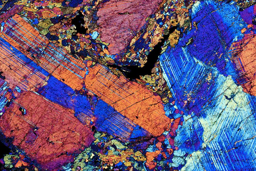

In [3]:
from duckduckgo_search import ddg_images
from fastdownload import download_url
def search_images(term, max_images=100):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')
urls = search_images('Granite thinsection image', max_images=1)
print(f'url of image : {urls[0]}')
dest = 'granite.jpg'
download_url(urls[0], dest, show_progress=True)
im = Image.open(dest)
im.to_thumb(256,256)

The above code will just search for the images you ask and give you result, It can be used to create dataset for your problem provided you know what data you want, but here we are not going to do that we are going to use the data that I provide in this notebook (if you are working on kaggle). If you are working on local machine or other online servers you have to download the data through Kaggle api.

In [4]:
data_path = '/kaggle/input/petrology-thin-section-data'

Data within kaggle are stored in kaggle/input/directory_name directory not in your current path, current path is always kaggle/working by default. You can check your current directory by using !pwd command in cell.

In [5]:
dls = ImageDataLoaders.from_folder(data_path, train='train', valid='validation', seed=12, item_tfms=[Resize(250), FlipItem(p=.5)], bs=32)

**Code Explanation** : The above line of code simply collect all the datas from train and validation folder present in data directory and create a batches of data called dataloader. The data loaders are randomly selected from the dataset using a random seed value of 12, which you can change. the item_tfms is called the item transformation it helps in transforming data such as resize, zoom, flip etc. The item transformation is very important in computer vision because it make your model more generalized or simply more stronger in interpretation even if we give some distorted data to it, this is also called data augmentation. Generally scientific datas are not distorted they are structured so, all augmentations are not usefull in this problem. I used only resize and flip.

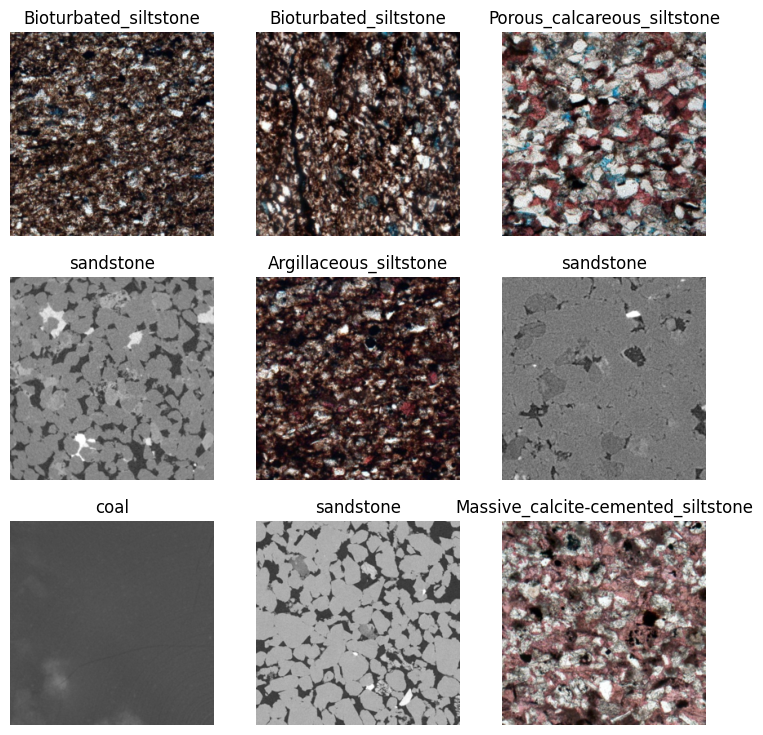

In [6]:
dls.show_batch()

The above code is a very amazing feature in fast ai it show you a batch of data as an image and you can do a quick check on data, sometimes your batches may be biased towards certain categories and your batch should be atleast same as the number of categories so that most of the categories are present in data. If you found any categories more, then either your data itself is a biased or you can choose some different random seed in image data loader.

In [7]:
model = vision_learner(dls, resnet34, metrics=accuracy)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 216MB/s]


The above code create a model using vision_learner of fastai. vision_learnercreate a model using dataloader, model name (resnet34 here) and metrics to use. resnet 34 is a pretrained model trained on certain dataset and we are using those weights as our initialization of weights. fastai by default consider pretrained weights for finetuning.

In [8]:
model.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.191739,0.079576,0.969011,04:45


epoch,train_loss,valid_loss,accuracy,time
0,0.077257,0.077061,0.973438,04:28
1,0.061458,0.061779,0.976881,04:32
2,0.056576,0.058455,0.982784,04:36
3,0.023277,0.044915,0.987703,04:28
4,0.018912,0.080739,0.983768,04:28
5,0.007633,0.048896,0.984752,04:32
6,0.010350,0.078409,0.981800,04:30
7,0.001415,0.052905,0.989670,04:28
8,0.000533,0.059583,0.986227,04:29
9,0.000118,0.062423,0.985735,04:28


The above code fine tune our model i.e. resnet on our data. It consider the pretrained model weights and fine tune them based on our categories. It is faster to finetune pretrained models than to train model from scratch because pretrained model already learned on some of the datas and are saved as a weights, we always first have to try fine tuning, if we are not satisfied with the model then we have to jump to custom models or other models that are trained on similar dataset. In the field of specializations mostly custom model works well or sometimes modification in pretrained models also works but main point is, we always have to go for finetune first.

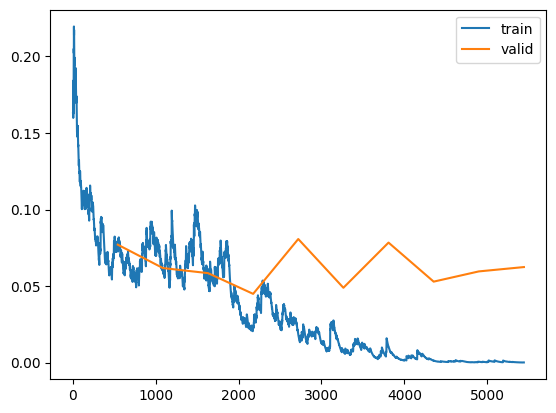

In [9]:
model.recorder.plot_loss()

In [10]:
interp = ClassificationInterpretation.from_learner(model)

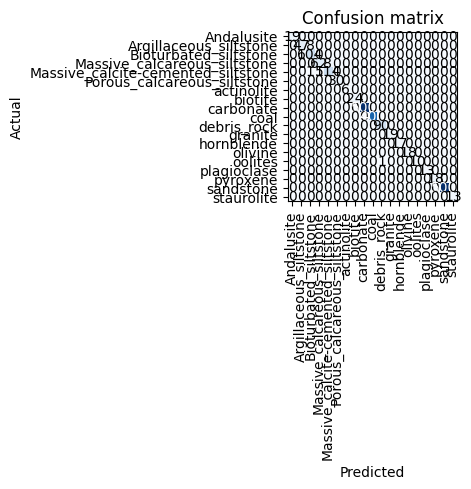

In [11]:
interp.plot_confusion_matrix()

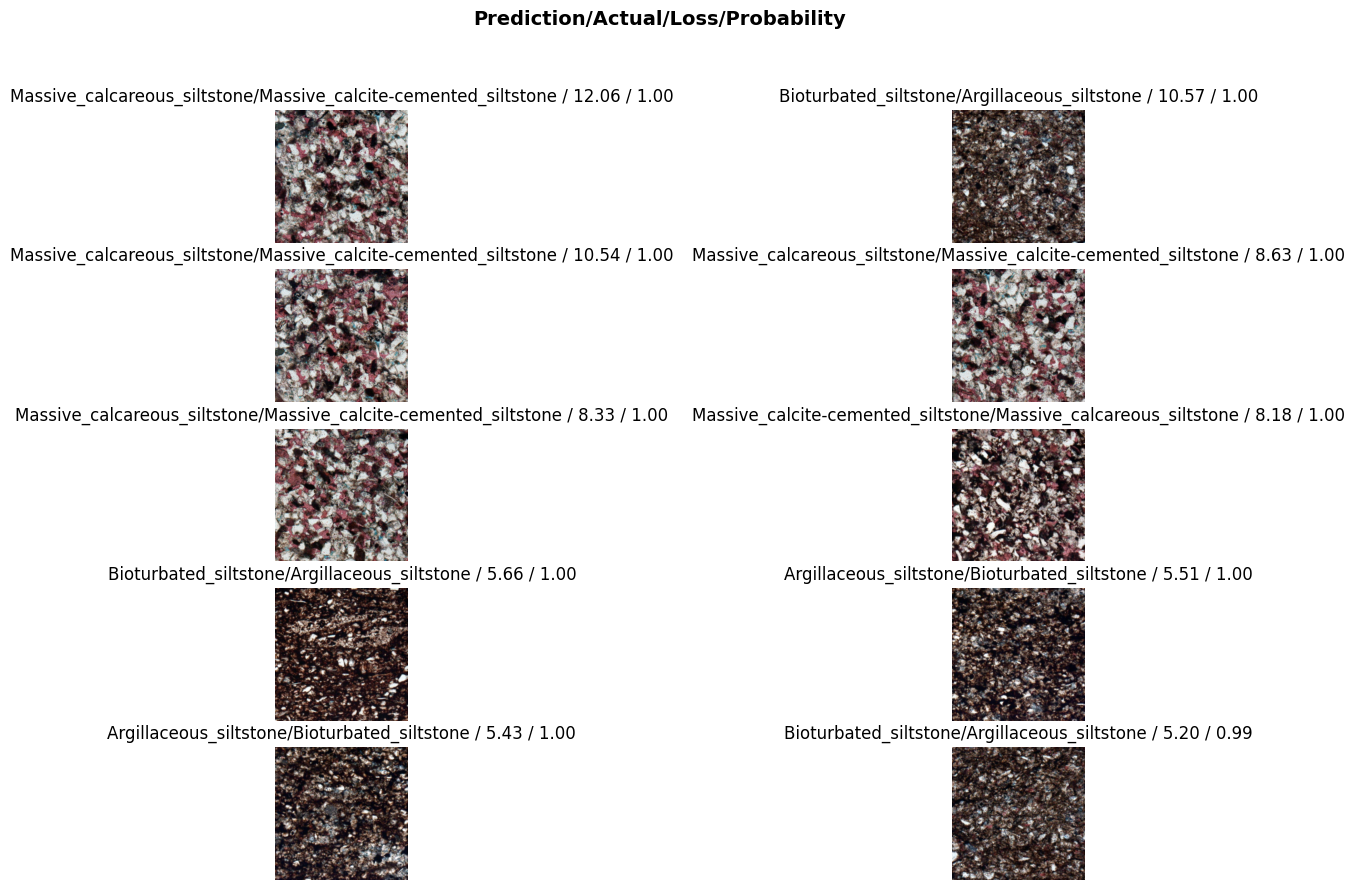

In [12]:
interp.plot_top_losses(10, nrows=5, figsize=(16,10))

Searching for 'sandstone thinsection image'
url of image : http://jm-derochette.be/images/WF_1/L5_LPA_I.jpg


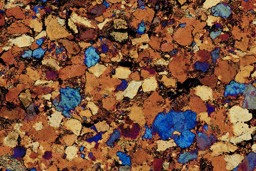

In [13]:
urls = search_images('sandstone thinsection image', max_images=4)
print(f'url of image : {urls[1]}')
dest = 'test.jpg'
download_url(urls[0], dest, show_progress=True)
im = Image.open(dest)
im.to_thumb(256,256)

In [14]:
r_name,pred_idx,probs = model.predict(PILImage.create('test.jpg'))
print(f"This is a: {r_name}.")
print(f"Probability it's a {r_name}: {probs[pred_idx]:.04f}")

This is a: granite.
Probability it's a granite: 0.8563


from fastdownload import download_url
download_url(search_images('olivine xpl thinsection image', max_images=1)[0], 'olivine.jpg', show_progress=True)
Image.open('olivine.jpg').to_thumb(256,256)

**Now please see above that our model is actually not correct we supply it a sandstone but it predicted it granite with 99% acuracy, that's the problem with AI model it is very hard to make a generalized model which works on new data which model have not seen before, even if the test is done on same category of data on which it is train.**

**if we see the top losses, this model is highly confused with the similar lokking dataset and also with some basic categories**

In these type of issues we either have to see our data again or we have to finetune other model or make our own custom model with hidden layer vizualization to understand what's going on in our model inside. 
Let's do that now.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

class PetronetL2(nn.Module):
    def __init__(self):
        super(PetronetL2, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv5 = nn.Conv2d(128, 32, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(32)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 31 * 31, 64)
        self.fc2 = nn.Linear(64, 32)
        self.dropout = nn.Dropout(0.4)
        self.fc3 = nn.Linear(32, 19)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.batchnorm1(x)
        x = self.pool1(x)
        x_p = x.clone()
        x = F.relu(self.conv3(torch.add(x,x_p)))
        x = F.relu(self.conv4(x))
        x = self.batchnorm2(x)
        x = self.pool2(x)
        x_p = x.clone()
        x = F.relu(self.conv5(torch.add(x,x_p)))
        x = F.relu(self.conv6(x))
        x = self.batchnorm3(x)
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x

# Create an instance of the model
petronet_l2 = PetronetL2()

# Print the model summary
print(petronet_l2)


PetronetL2(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

In [16]:
model = Learner(dls, PetronetL2(), metrics=accuracy)
model.model

PetronetL2(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

In [17]:
model.fit_one_cycle(n_epoch=5, lr_max=1e-3, cbs=[EarlyStoppingCallback(patience=3)])

epoch,train_loss,valid_loss,accuracy,time
0,2.362395,2.357806,0.671913,04:38
1,2.317071,2.285394,0.745204,04:41
2,2.289551,2.256253,0.774717,04:37
3,2.274667,2.256290,0.774717,04:32
4,2.272350,2.256255,0.774717,04:38


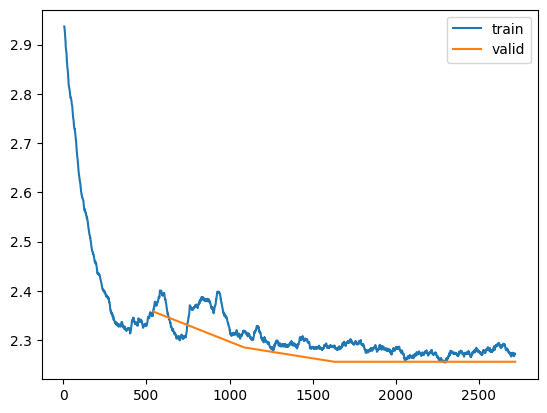

In [18]:
model.recorder.plot_loss()

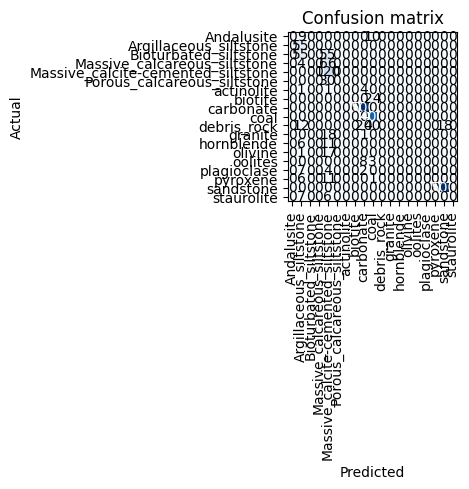

In [19]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

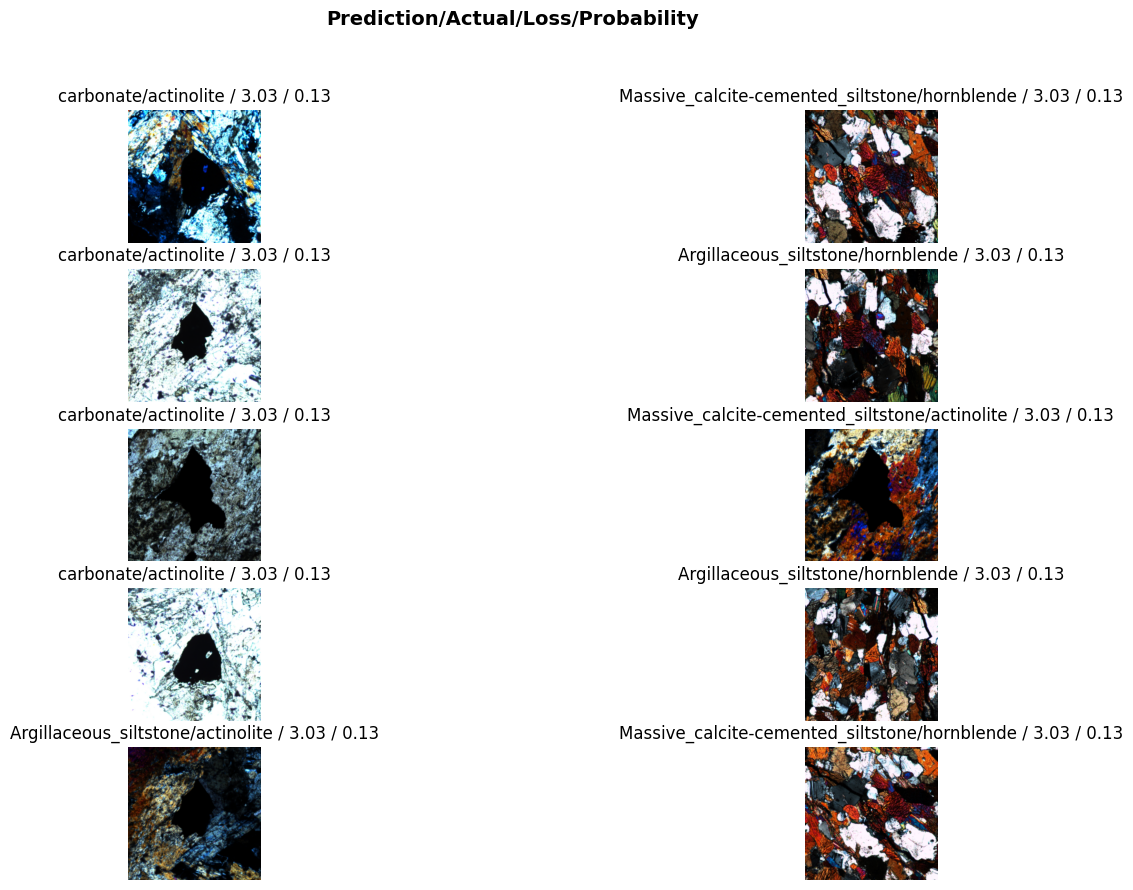

In [20]:
interp.plot_top_losses(10, nrows=5, figsize=(16,10))

Searching for 'granite xpl thinsection image'
url of image : https://images.fineartamerica.com/images-medium-large/2-granite-thin-section-polarised-lm-pasieka.jpg


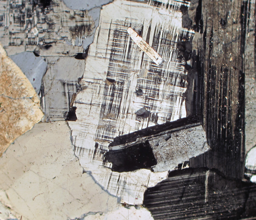

In [21]:
urls = search_images('granite xpl thinsection image', max_images=4)
print(f'url of image : {urls[2]}')
dest = 'test.jpg'
download_url(urls[1], dest, show_progress=True)
im = Image.open(dest)
im.to_thumb(256,256)

In [22]:
r_name,pred_idx,probs = model.predict(PILImage.create('test.jpg'))
print(f"This is a: {r_name}.")
print(f"Probability it's a {r_name}: {probs[pred_idx]:.04f}")

This is a: carbonate.
Probability it's a carbonate: 0.1312


In [23]:
model.export('/kaggle/working/petronet.pkl')

The above model is much better than the resnet model, although the prediction is not correct but the accuracy of prediction is matching atleast it is not showing high loss with high probability. The model can be improved with further training but the main thing is it give us with prediction with the accuracy which is acceptable. If this model is further changed and trained with hyperperameter tuning we can achieve high accuracy with good model.